In [1]:
# pip install scikit-survival

In [2]:
# Random forest

In [3]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.ensemble import RandomSurvivalForest

In [4]:
X, y = load_whas500()
X = X.astype(float)

In [5]:
X

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
0,1.0,83.0,0.0,25.54051,0.0,1.0,78.0,0.0,89.0,5.0,1.0,0.0,0.0,152.0
1,0.0,49.0,0.0,24.02398,0.0,1.0,60.0,0.0,84.0,5.0,0.0,1.0,0.0,120.0
2,0.0,70.0,0.0,22.14290,0.0,0.0,88.0,1.0,83.0,5.0,0.0,1.0,0.0,147.0
3,0.0,70.0,0.0,26.63187,1.0,1.0,76.0,0.0,65.0,10.0,0.0,1.0,0.0,123.0
4,0.0,70.0,0.0,24.41255,0.0,1.0,85.0,0.0,63.0,6.0,0.0,1.0,0.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,76.0,0.0,27.96454,0.0,1.0,88.0,1.0,68.0,1.0,0.0,1.0,0.0,112.0
496,0.0,76.0,0.0,24.26862,0.0,1.0,96.0,1.0,88.0,3.0,0.0,0.0,0.0,208.0
497,1.0,57.0,0.0,42.13576,0.0,1.0,74.0,1.0,123.0,3.0,0.0,0.0,0.0,120.0
498,0.0,67.0,0.0,27.40905,0.0,1.0,62.0,0.0,59.0,1.0,0.0,1.0,0.0,112.0


In [6]:
estimator = RandomSurvivalForest().fit(X, y)

In [7]:
X.iloc[:5]

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
0,1.0,83.0,0.0,25.54051,0.0,1.0,78.0,0.0,89.0,5.0,1.0,0.0,0.0,152.0
1,0.0,49.0,0.0,24.02398,0.0,1.0,60.0,0.0,84.0,5.0,0.0,1.0,0.0,120.0
2,0.0,70.0,0.0,22.14290,0.0,0.0,88.0,1.0,83.0,5.0,0.0,1.0,0.0,147.0
3,0.0,70.0,0.0,26.63187,1.0,1.0,76.0,0.0,65.0,10.0,0.0,1.0,0.0,123.0
4,0.0,70.0,0.0,24.41255,0.0,1.0,85.0,0.0,63.0,6.0,0.0,1.0,0.0,135.0


In [8]:
chf_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:5])

In [9]:
chf_funcs.shape

(5,)

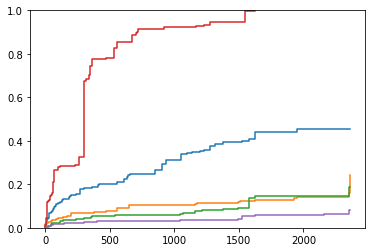

In [10]:
for fn in chf_funcs:
   plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

In [11]:
# Tree
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.tree import SurvivalTree

In [12]:
X, y = load_whas500()
X = X.astype(float)

In [13]:
y.shape

(500,)

In [14]:
estimator = SurvivalTree().fit(X, y)

In [15]:
chf_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:5])

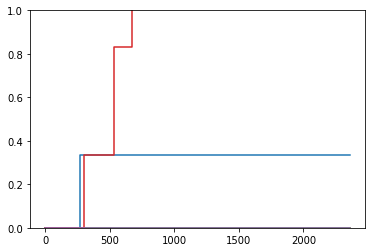

In [16]:
for fn in chf_funcs:
   plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

In [17]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.ensemble import ExtraSurvivalTrees

In [18]:
X, y = load_whas500()
X = X.astype(float)

In [19]:
estimator = ExtraSurvivalTrees().fit(X, y)

In [20]:
surv_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:5])

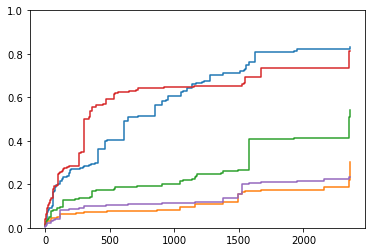

In [21]:
for fn in surv_funcs:
   plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

In [22]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

In [23]:
X, y = load_whas500()
X = X.astype(float)

In [24]:
estimator = GradientBoostingSurvivalAnalysis(loss="coxph").fit(X, y)

In [25]:
chf_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:5])

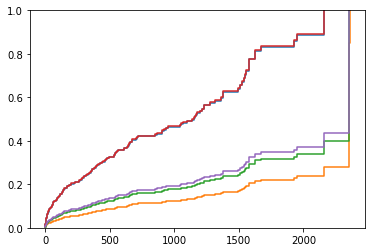

In [26]:
for fn in chf_funcs:
    plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()